In [ ]:
Project Description
The dataset contains grades scored by students throughout their university tenure in various courses and their CGPA calculated based on their grades
Columns Description-  total 43 columns
-Seat No : The enrolled number of candidate that took the exams

CGPA : The cumulative GPA based on the four year total grade progress of each candidate . CGPA is a Final Marks -- provided to student.
 
· All other columns are course codes in the format AB-XXX where AB are alphabets representing candidates' departments and XXX are numbers where first X represents the year the canditate took exam

 
Predict - CGPA of a student based on different grades in four years.

CGPA is a Final mark as defined therefore this is continuous data.It's a regression problem.


In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#extract the data from source
df=pd.read_csv(r"C:\Users\bee\Desktop\Data set\Grades.csv")
df.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [3]:
df.tail()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193
570,CS-97571,C,D,D,C,C,D+,B,C+,C,...,C+,C,B-,D,F,C-,B+,D,C-,1.753


In [ ]:
#Exploratory data analysis(EDA)-this is where we do the following among others
#1.Check Shape of dataset 
#2.Check Null values 
#3.Checking information 
#4.Extracting Statistics of the dataset 
#5.Checking data dtypes 
#6.Check for duplicates in the dataset
#6.Transform the dataset,drop unnecessary columns or change column names to make data more meaningful

In [4]:
#check shape of data
df.shape

(571, 43)

In [5]:
#printing a list of columns to have a clear view of coulmns in the dataset
df.columns.tolist()

['Seat No.',
 'PH-121',
 'HS-101',
 'CY-105',
 'HS-105/12',
 'MT-111',
 'CS-105',
 'CS-106',
 'EL-102',
 'EE-119',
 'ME-107',
 'CS-107',
 'HS-205/20',
 'MT-222',
 'EE-222',
 'MT-224',
 'CS-210',
 'CS-211',
 'CS-203',
 'CS-214',
 'EE-217',
 'CS-212',
 'CS-215',
 'MT-331',
 'EF-303',
 'HS-304',
 'CS-301',
 'CS-302',
 'TC-383',
 'MT-442',
 'EL-332',
 'CS-318',
 'CS-306',
 'CS-312',
 'CS-317',
 'CS-403',
 'CS-421',
 'CS-406',
 'CS-414',
 'CS-419',
 'CS-423',
 'CS-412',
 'CGPA']

In [6]:
#checking datatype
df.dtypes

Seat No.      object
PH-121        object
HS-101        object
CY-105        object
HS-105/12     object
MT-111        object
CS-105        object
CS-106        object
EL-102        object
EE-119        object
ME-107        object
CS-107        object
HS-205/20     object
MT-222        object
EE-222        object
MT-224        object
CS-210        object
CS-211        object
CS-203        object
CS-214        object
EE-217        object
CS-212        object
CS-215        object
MT-331        object
EF-303        object
HS-304        object
CS-301        object
CS-302        object
TC-383        object
MT-442        object
EL-332        object
CS-318        object
CS-306        object
CS-312        object
CS-317        object
CS-403        object
CS-421        object
CS-406        object
CS-414        object
CS-419        object
CS-423        object
CS-412        object
CGPA         float64
dtype: object

In [7]:
#Now that the column names are clear,we see that the Seat No column has no impact on the Final marks required,it is a mere label therefore unnecessary,we drop it
#Dropping irrelevant columns which are simply labels
df.drop(columns= ['Seat No.'], axis = 1, inplace = True)

In [8]:
df

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,A,D,D+,D,B-,C,D,A,D+,D,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,B,A,A,A-,A+,A,A-,A-,A+,B+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,A+,A,A,A,A,A,A,A-,A,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,B,A,A-,B+,A,A,A,A,A,B,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,A,B+,D,A,D,D+,B-,C-,B-,C-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [9]:
#check data shape after removing irrelevant column
df.shape

(571, 42)

In [10]:
#Checking Duplicate value in dataframe
print("Total Duplicate Rows are",df.duplicated().sum())

Total Duplicate Rows are 0


In [11]:
#Checking information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 42 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PH-121     571 non-null    object 
 1   HS-101     571 non-null    object 
 2   CY-105     570 non-null    object 
 3   HS-105/12  570 non-null    object 
 4   MT-111     569 non-null    object 
 5   CS-105     571 non-null    object 
 6   CS-106     569 non-null    object 
 7   EL-102     569 non-null    object 
 8   EE-119     569 non-null    object 
 9   ME-107     569 non-null    object 
 10  CS-107     569 non-null    object 
 11  HS-205/20  566 non-null    object 
 12  MT-222     566 non-null    object 
 13  EE-222     564 non-null    object 
 14  MT-224     564 non-null    object 
 15  CS-210     564 non-null    object 
 16  CS-211     566 non-null    object 
 17  CS-203     566 non-null    object 
 18  CS-214     565 non-null    object 
 19  EE-217     565 non-null    object 
 20  CS-212    

In [12]:
#checking for null values(there are several columns with null values)
df.isnull().sum()

PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [13]:
#Fill Nan values with mode
columns = ['PH-121',
 'HS-101',
 'CY-105',
 'HS-105/12',
 'MT-111',
 'CS-105',
 'CS-106',
 'EL-102',
 'EE-119',
 'ME-107',
 'CS-107',
 'HS-205/20',
 'MT-222',
 'EE-222',
 'MT-224',
 'CS-210',
 'CS-211',
 'CS-203',
 'CS-214',
 'EE-217',
 'CS-212',
 'CS-215',
 'MT-331',
 'EF-303',
 'HS-304',
 'CS-301',
 'CS-302',
 'TC-383',
 'MT-442',
 'EL-332',
 'CS-318',
 'CS-306',
 'CS-312',
 'CS-317',
 'CS-403',
 'CS-421',
 'CS-406',
 'CS-414',
 'CS-419',
 'CS-423',
 'CS-412',
 'CGPA']
df[columns]=df[columns].fillna(df.mode().iloc[0])

In [14]:
#checking for null values again(there are no more null values)
df.isnull().sum()

PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

<Axes: >

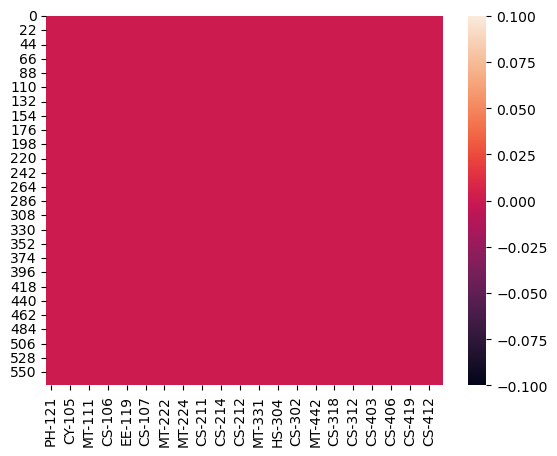

In [15]:
#checking null values using the heatmap(there no null values in the data set)
sns.heatmap(df.isnull())

In [16]:
#checking number of unique values
df.nunique().to_frame("No. of Unique values")

,No. of Unique values
PH-121,13
HS-101,12
CY-105,13
HS-105/12,13
MT-111,13
CS-105,11
CS-106,13
EL-102,13
EE-119,12
ME-107,13


In [17]:
#checking the list of counts of target column.
df["CGPA"].nunique()

491

In [18]:
#Statistical summary of numerical columns
df.describe()# there is only one numerical column which happens to be the target variable,we can't use that to infer into the data and give the result required,we need to change alphabetic data to numerical data for statistical analysis

,CGPA
count,571.000000
mean,2.954888
std,0.620552
min,0.800000
25%,2.538000
50%,3.029000
75%,3.451000
max,3.985000


In [19]:
#Transforming alphabetic data to numeric so that it can be read by the computer program and also for statistical analysis
from sklearn.preprocessing import OrdinalEncoder 
OE=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))
df


,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,5.0,10.0,8.0,6.0,8.0,10.0,9.0,8.0,5.0,8.0,...,8.0,8.0,8.0,8.0,2.0,0.0,8.0,3.0,2.0,2.205
1,0.0,9.0,10.0,9.0,5.0,6.0,9.0,0.0,10.0,9.0,...,10.0,9.0,6.0,9.0,2.0,5.0,6.0,6.0,3.0,2.008
2,0.0,3.0,0.0,5.0,4.0,0.0,5.0,4.0,2.0,2.0,...,3.0,3.0,0.0,6.0,0.0,0.0,0.0,2.0,0.0,3.608
3,9.0,7.0,10.0,9.0,9.0,2.0,10.0,8.0,9.0,7.0,...,10.0,6.0,10.0,8.0,5.0,3.0,7.0,7.0,7.0,1.906
4,2.0,2.0,2.0,4.0,0.0,0.0,2.0,4.0,0.0,2.0,...,5.0,4.0,4.0,5.0,2.0,0.0,2.0,2.0,0.0,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,3.0,0.0,0.0,2.0,1.0,0.0,2.0,2.0,1.0,4.0,...,2.0,2.0,0.0,0.0,0.0,4.0,4.0,3.0,0.0,3.798
567,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,4.0,4.0,0.0,0.0,2.0,3.0,2.0,6.0,2.0,3.772
568,3.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,3.0,...,2.0,3.0,0.0,4.0,0.0,6.0,4.0,2.0,2.0,3.470
569,0.0,4.0,9.0,0.0,9.0,10.0,5.0,8.0,5.0,8.0,...,9.0,3.0,3.0,8.0,9.0,6.0,3.0,5.0,6.0,2.193


In [20]:
#check if all object columns have been converted to numerical data
df.dtypes

PH-121       float64
HS-101       float64
CY-105       float64
HS-105/12    float64
MT-111       float64
CS-105       float64
CS-106       float64
EL-102       float64
EE-119       float64
ME-107       float64
CS-107       float64
HS-205/20    float64
MT-222       float64
EE-222       float64
MT-224       float64
CS-210       float64
CS-211       float64
CS-203       float64
CS-214       float64
EE-217       float64
CS-212       float64
CS-215       float64
MT-331       float64
EF-303       float64
HS-304       float64
CS-301       float64
CS-302       float64
TC-383       float64
MT-442       float64
EL-332       float64
CS-318       float64
CS-306       float64
CS-312       float64
CS-317       float64
CS-403       float64
CS-421       float64
CS-406       float64
CS-414       float64
CS-419       float64
CS-423       float64
CS-412       float64
CGPA         float64
dtype: object

In [21]:
#Now that the data is now all numerical,we can get its statistical metrics useful for analysis
#Statistical summary of numerical columns
df.describe()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,...,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000
mean,3.781086,5.071804,2.898424,4.241681,3.896673,2.838879,4.122592,3.959720,3.886165,4.779335,...,4.071804,4.835377,3.432574,5.385289,2.984238,2.397548,3.856392,3.966725,3.049037,2.954888
std,3.046895,2.785317,2.964737,3.200507,2.988546,2.696709,2.727192,3.031436,2.657528,3.146202,...,3.362345,2.740382,2.980685,2.729063,2.468346,2.499388,2.382769,2.795475,2.332316,0.620552
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000
25%,2.000000,3.000000,0.000000,2.000000,2.000000,0.000000,2.000000,2.000000,2.000000,2.000000,...,1.000000,3.000000,0.000000,3.000000,2.000000,0.000000,2.000000,2.000000,2.000000,2.538000
50%,3.000000,5.000000,2.000000,4.000000,4.000000,2.000000,4.000000,3.000000,3.000000,5.000000,...,3.000000,5.000000,3.000000,5.000000,2.000000,2.000000,4.000000,4.000000,2.000000,3.029000
75%,6.000000,7.000000,4.500000,7.000000,6.000000,4.000000,5.000000,6.000000,6.000000,8.000000,...,7.000000,7.000000,5.000000,7.000000,4.000000,4.000000,5.000000,6.000000,4.000000,3.451000
max,12.000000,11.000000,12.000000,12.000000,12.000000,10.000000,12.000000,12.000000,11.000000,12.000000,...,13.000000,11.000000,10.000000,12.000000,13.000000,12.000000,11.000000,11.000000,12.000000,3.985000


In [ ]:
#explain the statistics
#columns like PH-121,HS-101,CY-105,HS-105/12,CS-105 only to mention a few have their mean values greater than the median(second percentile)which means the data is skewed to the right.
#where mean is less than the median the data is skewed to the left
#there are huge differences between figures in the third percentile andmax,this sigifies that there are outliers in the data

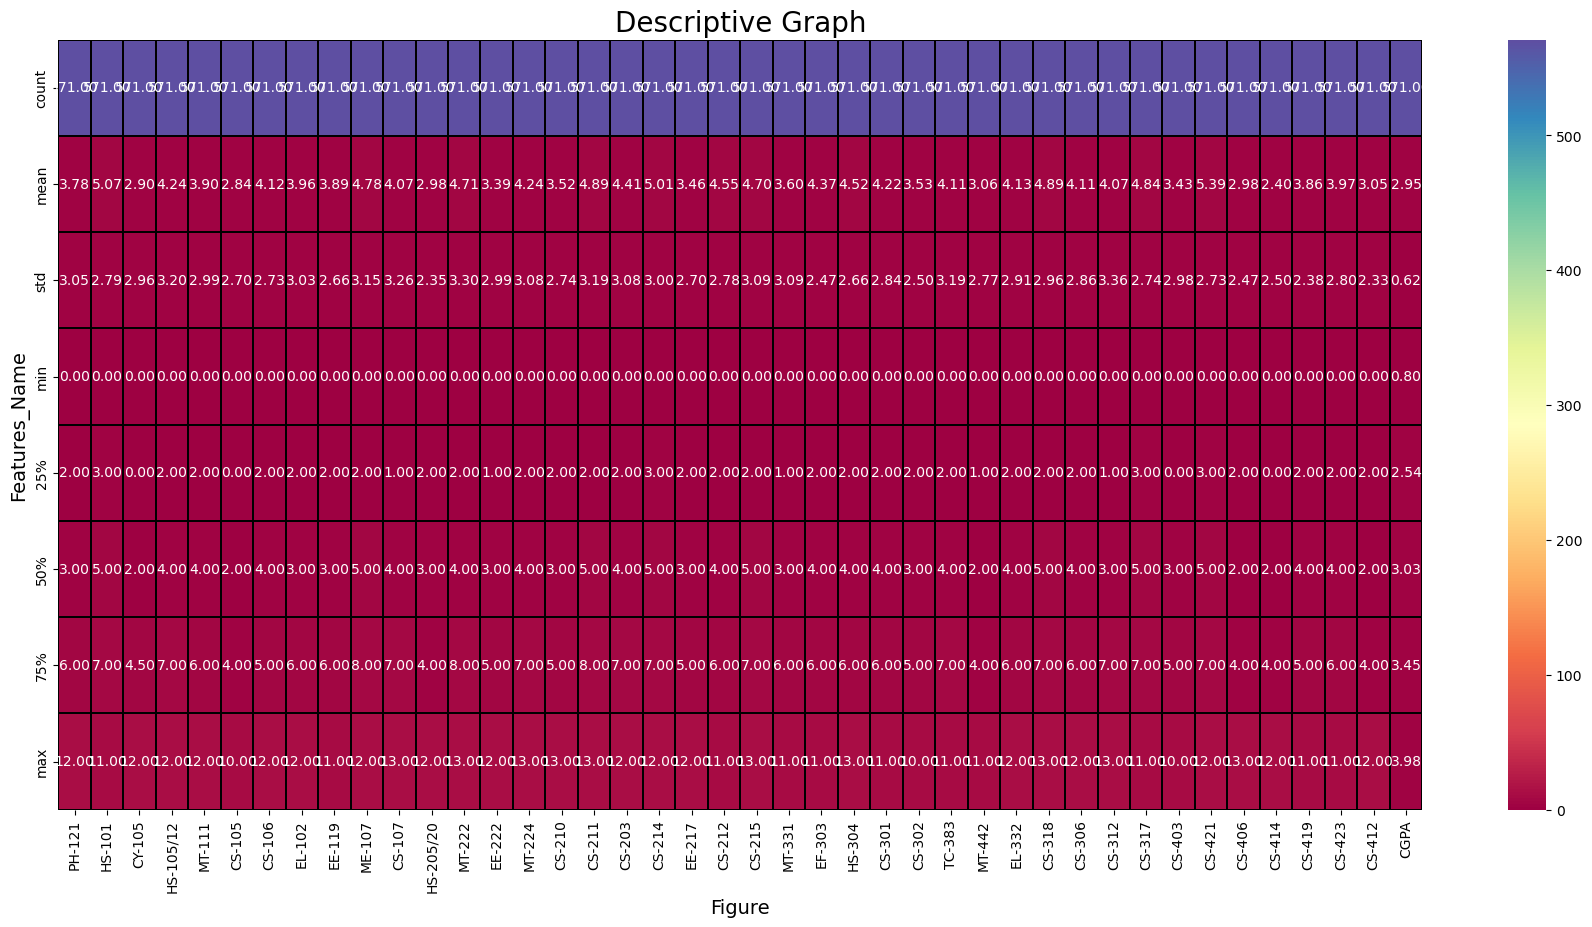

In [22]:
#Graphical view of statistical data description
plt.figure(figsize=(22,10))
sns.heatmap(df.describe(),annot=True,fmt='0.2f',linewidth=0.2,linecolor='black',cmap='Spectral')
plt.xlabel('Figure',fontsize=14)
plt.ylabel('Features_Name',fontsize=14)
plt.title('Descriptive Graph',fontsize=20)
plt.show()

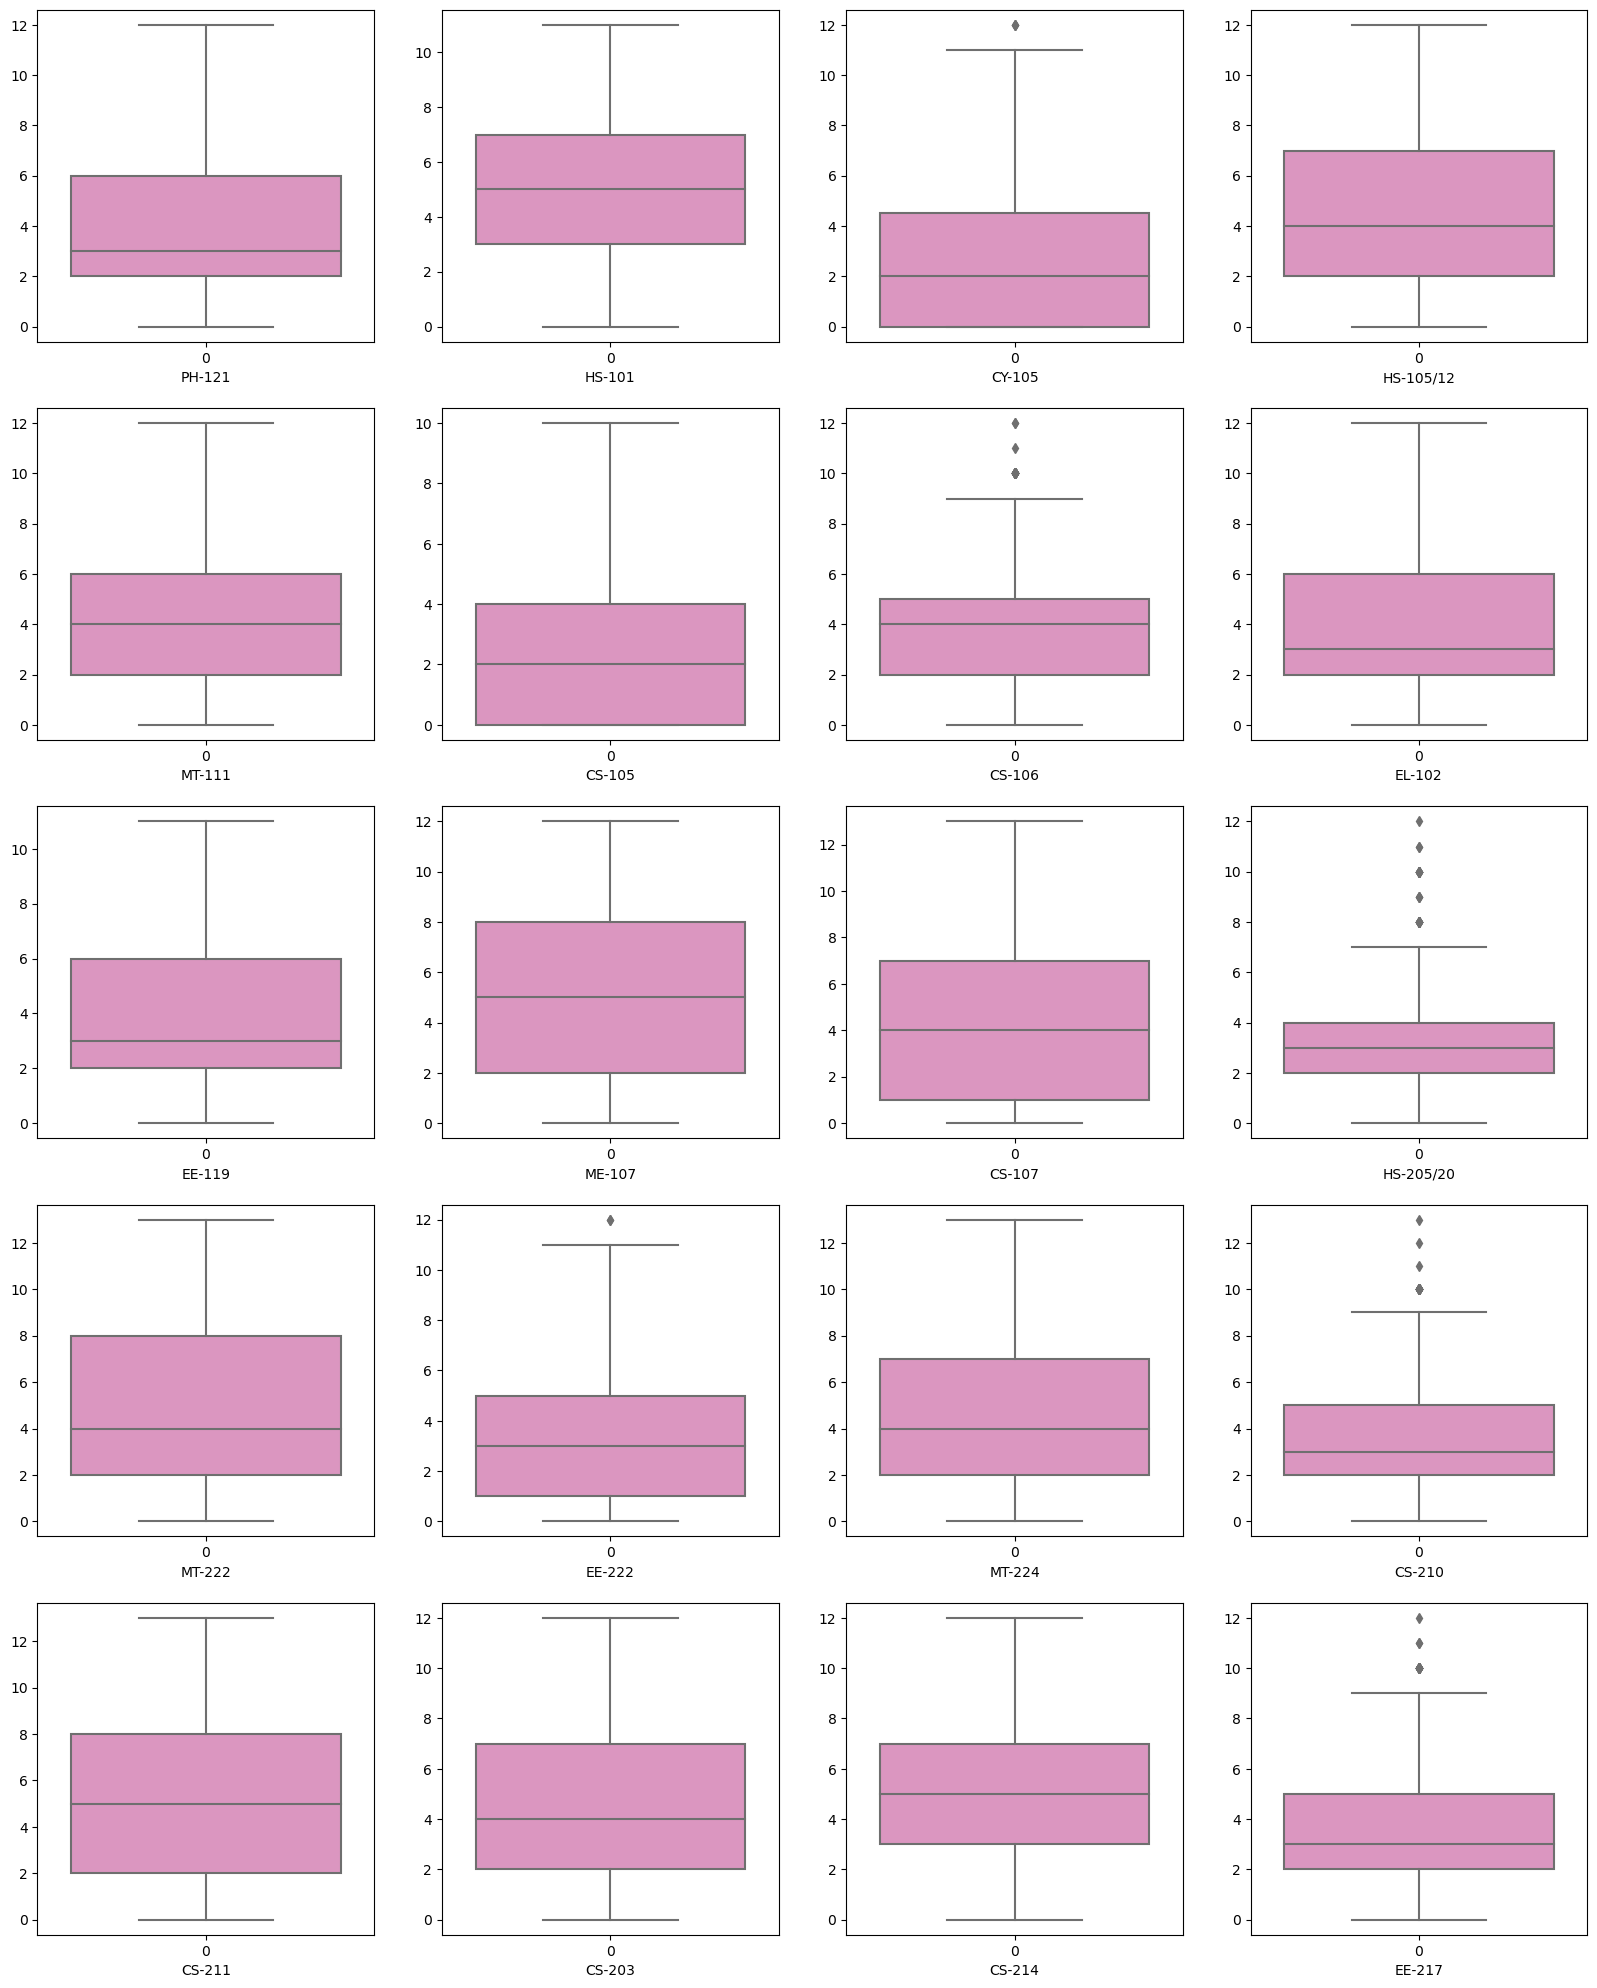

In [24]:
#Checking outliers using boxplot-This is a visual confirmation of the presence of outliers as explained in the statistical description
plt.figure(figsize=(20,25))
p=1
for i in df:
    if p<=20:
        plt.subplot(5,4,p)
        sns.boxplot(df[i], palette ="Set2_r")
        plt.xlabel(i)
        
    p+=1
    
plt.show()

In [26]:
#Remove outliers using zscore method and Inter quartile range method then compare the two
#Note that we do not remove outliers from the target variable (CGPA)
from scipy.stats import zscore
out_features=df[['PH-121',
 'HS-101',
 'CY-105',
 'HS-105/12',
 'MT-111',
 'CS-105',
 'CS-106',
 'EL-102',
 'EE-119',
 'ME-107',
 'CS-107',
 'HS-205/20',
 'MT-222',
 'EE-222',
 'MT-224',
 'CS-210',
 'CS-211',
 'CS-203',
 'CS-214',
 'EE-217',
 'CS-212',
 'CS-215',
 'MT-331',
 'EF-303',
 'HS-304',
 'CS-301',
 'CS-302',
 'TC-383',
 'MT-442',
 'EL-332',
 'CS-318',
 'CS-306',
 'CS-312',
 'CS-317',
 'CS-403',
 'CS-421',
 'CS-406',
 'CS-414',
 'CS-419',
 'CS-423',
 'CS-412',
 'CGPA']]
z=np.abs(zscore(out_features))
z

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,0.400402,1.770900,1.722261,0.549869,1.374222,2.657832,1.790004,1.333963,0.419492,1.024565,...,1.169315,1.155824,1.533685,0.958939,0.399094,0.960095,1.740513,0.346121,0.450178,1.209480
1,1.242052,1.411559,2.397448,1.488043,0.369509,1.173242,1.790004,1.307365,2.302589,1.342687,...,1.764660,1.521056,0.862110,1.325686,0.399094,1.042149,0.900418,0.727983,0.021043,1.527217
2,1.242052,0.744483,0.978490,0.237145,0.034605,1.053643,0.322008,0.013299,0.710366,0.884168,...,0.319046,0.670339,1.152616,0.225444,1.210063,0.960095,1.619869,0.704156,1.308446,1.053392
3,1.714365,0.692879,2.397448,1.488043,1.709126,0.311348,2.157003,1.333963,1.925970,0.706443,...,1.764660,0.425358,2.205260,0.958939,0.817361,0.241251,1.320466,1.086017,1.695494,1.691731
4,0.585070,1.103823,0.303302,0.075580,1.305012,1.053643,0.778989,0.013299,1.463605,0.884168,...,0.276298,0.305107,0.190534,0.141304,0.399094,0.960095,0.779774,0.704156,1.308446,0.795331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,0.256579,1.822504,0.978490,0.701029,0.970108,1.053643,0.778989,0.647033,1.086986,0.247924,...,0.616719,1.035572,1.152616,1.975041,1.210063,0.641700,0.060322,0.346121,1.308446,1.359839
567,0.913561,1.822504,0.978490,1.326478,1.305012,1.053643,1.512987,0.647033,1.463605,1.520412,...,0.021374,0.305107,1.152616,1.975041,0.399094,0.241251,0.779774,0.727983,0.450178,1.317904
568,0.256579,1.822504,0.303302,0.075580,1.305012,1.053643,1.512987,1.307365,1.463605,0.566046,...,0.616719,0.670339,1.152616,0.508051,1.210063,1.442597,0.060322,0.704156,0.450178,0.830814
569,1.242052,0.385142,2.059854,1.326478,1.709126,2.657832,0.322008,1.333963,0.419492,1.024565,...,1.466987,0.670339,0.145253,0.958939,2.439300,1.442597,0.359726,0.369948,1.266360,1.228834


In [27]:
#threshold
np.where (z>3)

(array([ 60,  60,  60,  91, 137, 143, 143, 281, 281, 281, 288, 288, 340,
        340, 352, 352, 382, 387, 387, 410, 423, 424, 432, 446, 447, 447,
        453, 453, 454, 454, 454, 509, 513, 516, 516, 521, 522, 522, 527,
        543, 543, 550, 550, 557, 560, 563, 565, 570], dtype=int64),
 array([ 2, 11, 19, 15,  2,  2, 41, 11, 15, 41, 11, 41, 24, 37, 24, 37, 37,
        37, 40, 37, 37, 37, 40, 36, 36, 37, 36, 40, 36, 37, 38, 36, 40, 36,
        40, 36, 36, 40, 40, 36, 40, 37, 40, 37, 37, 38, 41, 36],
       dtype=int64))

In [31]:
z.iloc[288,11]

3.4145212525108373

In [32]:
#removing the data above zscore and creating new dataframe
df1=df[(z<3).all(axis=1)]
df1.shape

(540, 42)

In [34]:
#shape of old and new dataframe
print("Old Data Frame-",df.shape[0])
print("New Data Frame-",df1.shape[0])

Old Data Frame- 571
New Data Frame- 540


In [35]:
print("Data Loss Percentage-",((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Data Loss Percentage- 5.42907180385289


In [36]:
df1

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,5.0,10.0,8.0,6.0,8.0,10.0,9.0,8.0,5.0,8.0,...,8.0,8.0,8.0,8.0,2.0,0.0,8.0,3.0,2.0,2.205
1,0.0,9.0,10.0,9.0,5.0,6.0,9.0,0.0,10.0,9.0,...,10.0,9.0,6.0,9.0,2.0,5.0,6.0,6.0,3.0,2.008
2,0.0,3.0,0.0,5.0,4.0,0.0,5.0,4.0,2.0,2.0,...,3.0,3.0,0.0,6.0,0.0,0.0,0.0,2.0,0.0,3.608
3,9.0,7.0,10.0,9.0,9.0,2.0,10.0,8.0,9.0,7.0,...,10.0,6.0,10.0,8.0,5.0,3.0,7.0,7.0,7.0,1.906
4,2.0,2.0,2.0,4.0,0.0,0.0,2.0,4.0,0.0,2.0,...,5.0,4.0,4.0,5.0,2.0,0.0,2.0,2.0,0.0,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.0,9.0,0.0,6.0,4.0,4.0,6.0,2.0,5.0,9.0,...,3.0,7.0,4.0,10.0,6.0,8.0,3.0,6.0,5.0,2.607
566,3.0,0.0,0.0,2.0,1.0,0.0,2.0,2.0,1.0,4.0,...,2.0,2.0,0.0,0.0,0.0,4.0,4.0,3.0,0.0,3.798
567,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,4.0,4.0,0.0,0.0,2.0,3.0,2.0,6.0,2.0,3.772
568,3.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,3.0,...,2.0,3.0,0.0,4.0,0.0,6.0,4.0,2.0,2.0,3.470


In [37]:
df=df1

In [38]:
#Removing outliers using the interquartile range method
#1st quartile
Q1=out_features.quantile(0.25) 

#3rd quartile
Q3=out_features.quantile(0.75)

#IQR
IQR=Q3-Q1
df2=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]
df2.shape

(437, 42)

In [39]:
print("Data Loss Percentage-",((df.shape[0]-df2.shape[0])/df.shape[0])*100)

Data Loss Percentage- 19.074074074074073


In [41]:
#We will choose the z score method because it is resulting in less data loss
df=df1

<Axes: xlabel='CGPA', ylabel='Count'>

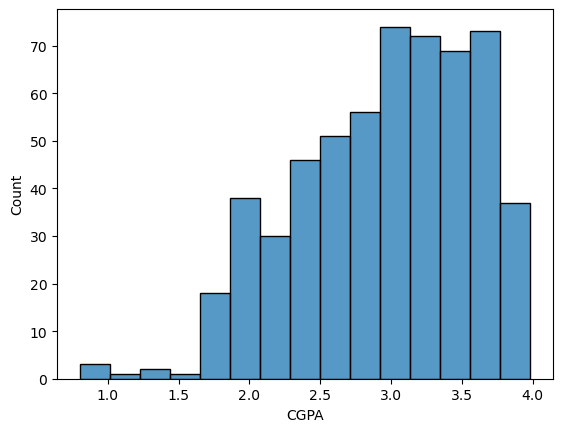

In [51]:
#Data visualisation
#Univariate analysis
#Visualize CGPA
sns.histplot(df['CGPA'])#the most CGPA is between 3.0 and 3.5


In [44]:
#Defining the data labels and features(dependent and independent variables respectively)
features = ['PH-121',
 'HS-101',
 'CY-105',
 'HS-105/12',
 'MT-111',
 'CS-105',
 'CS-106',
 'EL-102',
 'EE-119',
 'ME-107',
 'CS-107',
 'HS-205/20',
 'MT-222',
 'EE-222',
 'MT-224',
 'CS-210',
 'CS-211',
 'CS-203',
 'CS-214',
 'EE-217',
 'CS-212',
 'CS-215',
 'MT-331',
 'EF-303',
 'HS-304',
 'CS-301',
 'CS-302',
 'TC-383',
 'MT-442',
 'EL-332',
 'CS-318',
 'CS-306',
 'CS-312',
 'CS-317',
 'CS-403',
 'CS-421',
 'CS-406',
 'CS-414',
 'CS-419',
 'CS-423',
 'CS-412','CGPA']
label = ['CGPA']

X = df[features]

y = df[label]

y['CGPA'].unique()

array([2.205, 2.008, 3.608, 1.906, 3.448, 3.026, 2.957, 3.043, 3.358,
       3.247, 2.681, 3.281, 2.792, 3.523, 3.443, 2.777, 3.248, 1.787,
       3.572, 3.483, 2.246, 2.956, 2.953, 3.586, 3.475, 2.228, 3.44 ,
       2.188, 3.195, 2.294, 3.133, 3.22 , 3.112, 3.16 , 3.019, 3.164,
       3.332, 2.165, 3.7  , 3.033, 2.696, 2.851, 3.058, 1.493, 2.069,
       1.996, 3.897, 3.848, 3.404, 2.254, 2.655, 3.106, 2.793, 3.023,
       3.01 , 3.4  , 1.899, 3.168, 2.57 , 2.564, 2.468, 3.769, 2.999,
       2.768, 2.822, 3.189, 2.715, 3.578, 3.49 , 2.805, 3.458, 2.34 ,
       3.252, 2.683, 3.378, 3.295, 3.193, 3.647, 2.815, 2.171, 3.761,
       2.763, 2.938, 2.06 , 1.261, 2.378, 2.861, 2.363, 2.084, 1.89 ,
       3.861, 1.805, 3.925, 3.919, 3.258, 3.963, 2.396, 3.772, 1.768,
       3.176, 3.335, 3.758, 3.208, 1.845, 3.946, 2.3  , 3.759, 3.516,
       2.087, 3.137, 2.011, 2.566, 1.993, 3.334, 2.056, 2.552, 2.028,
       2.58 , 3.651, 2.928, 2.659, 3.174, 3.03 , 2.208, 2.698, 2.823,
       2.407, 2.379,

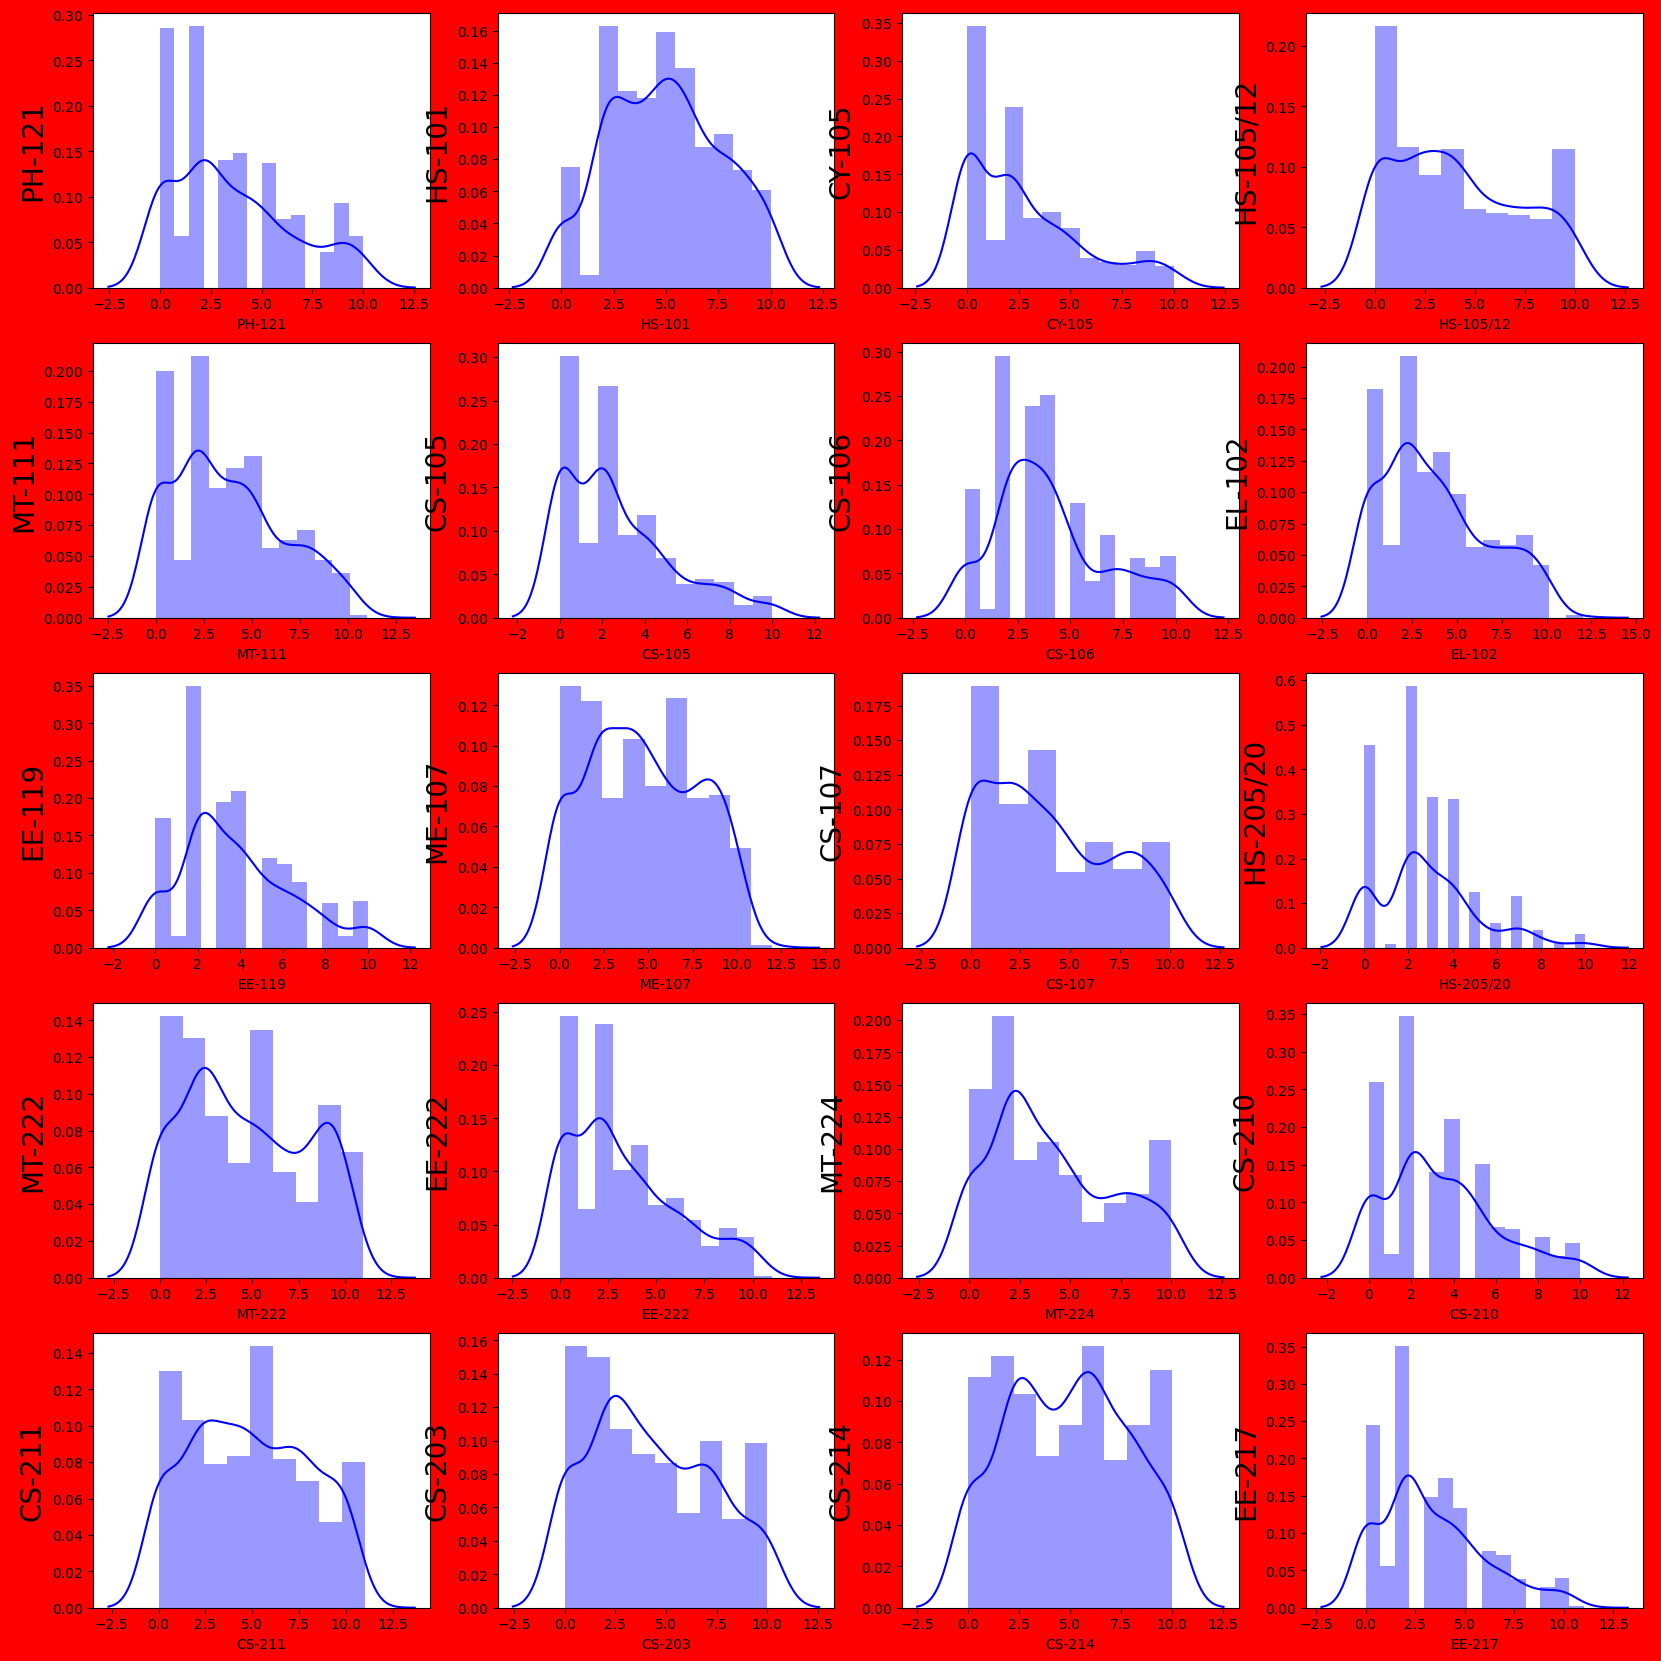

In [45]:
#checking distribution of data
plt.figure(figsize=(20,25), facecolor='red')
plotnumber = 1

for column in df:
    if plotnumber<=20:     
        ax = plt.subplot(6,4,plotnumber)
        sns.distplot(df[column],color='b')
        plt.ylabel(column,fontsize=20)
    plotnumber+=1
plt.show() #From the distribution plots above we can see that the data almost looks normal but there is skeweness as explained while observing statistics.

In [47]:
#Checking for Skewness
df.skew()

PH-121       0.584635
HS-101       0.077832
CY-105       0.965383
HS-105/12    0.342876
MT-111       0.477938
CS-105       0.977089
CS-106       0.631239
EL-102       0.529832
EE-119       0.616175
ME-107       0.124749
CS-107       0.429084
HS-205/20    0.803608
MT-222       0.189265
EE-222       0.736166
MT-224       0.434603
CS-210       0.670833
CS-211       0.088682
CS-203       0.283504
CS-214       0.033208
EE-217       0.739961
CS-212       0.414343
CS-215       0.152343
MT-331       0.665673
EF-303       0.349495
HS-304       0.445965
CS-301       0.417994
CS-302       0.614465
TC-383       0.366286
MT-442       0.869584
EL-332       0.447268
CS-318       0.336743
CS-306       0.426478
CS-312       0.442731
CS-317       0.147751
CS-403       0.601691
CS-421       0.108350
CS-406       1.354857
CS-414       0.889301
CS-419       0.449746
CS-423       0.498233
CS-412       0.900809
CGPA        -0.388866
dtype: float64

In [49]:
#Skeweness must be between -0.5 and 0.5,if not it must be removed
#Skeweness should not be removed from the target variable
#Remove skewness using cuberoot method
df['CS-406']=np.cbrt(df['CS-406'])

In [51]:
 #Checking for Skewness again-the skeweness has been reduced in CS-406 column but this had no material on the skeweness of the other columns 
df.skew()

PH-121       0.584635
HS-101       0.077832
CY-105       0.965383
HS-105/12    0.342876
MT-111       0.477938
CS-105       0.977089
CS-106       0.631239
EL-102       0.529832
EE-119       0.616175
ME-107       0.124749
CS-107       0.429084
HS-205/20    0.803608
MT-222       0.189265
EE-222       0.736166
MT-224       0.434603
CS-210       0.670833
CS-211       0.088682
CS-203       0.283504
CS-214       0.033208
EE-217       0.739961
CS-212       0.414343
CS-215       0.152343
MT-331       0.665673
EF-303       0.349495
HS-304       0.445965
CS-301       0.417994
CS-302       0.614465
TC-383       0.366286
MT-442       0.869584
EL-332       0.447268
CS-318       0.336743
CS-306       0.426478
CS-312       0.442731
CS-317       0.147751
CS-403       0.601691
CS-421       0.108350
CS-406      -1.917768
CS-414       0.889301
CS-419       0.449746
CS-423       0.498233
CS-412       0.900809
CGPA        -0.388866
dtype: float64

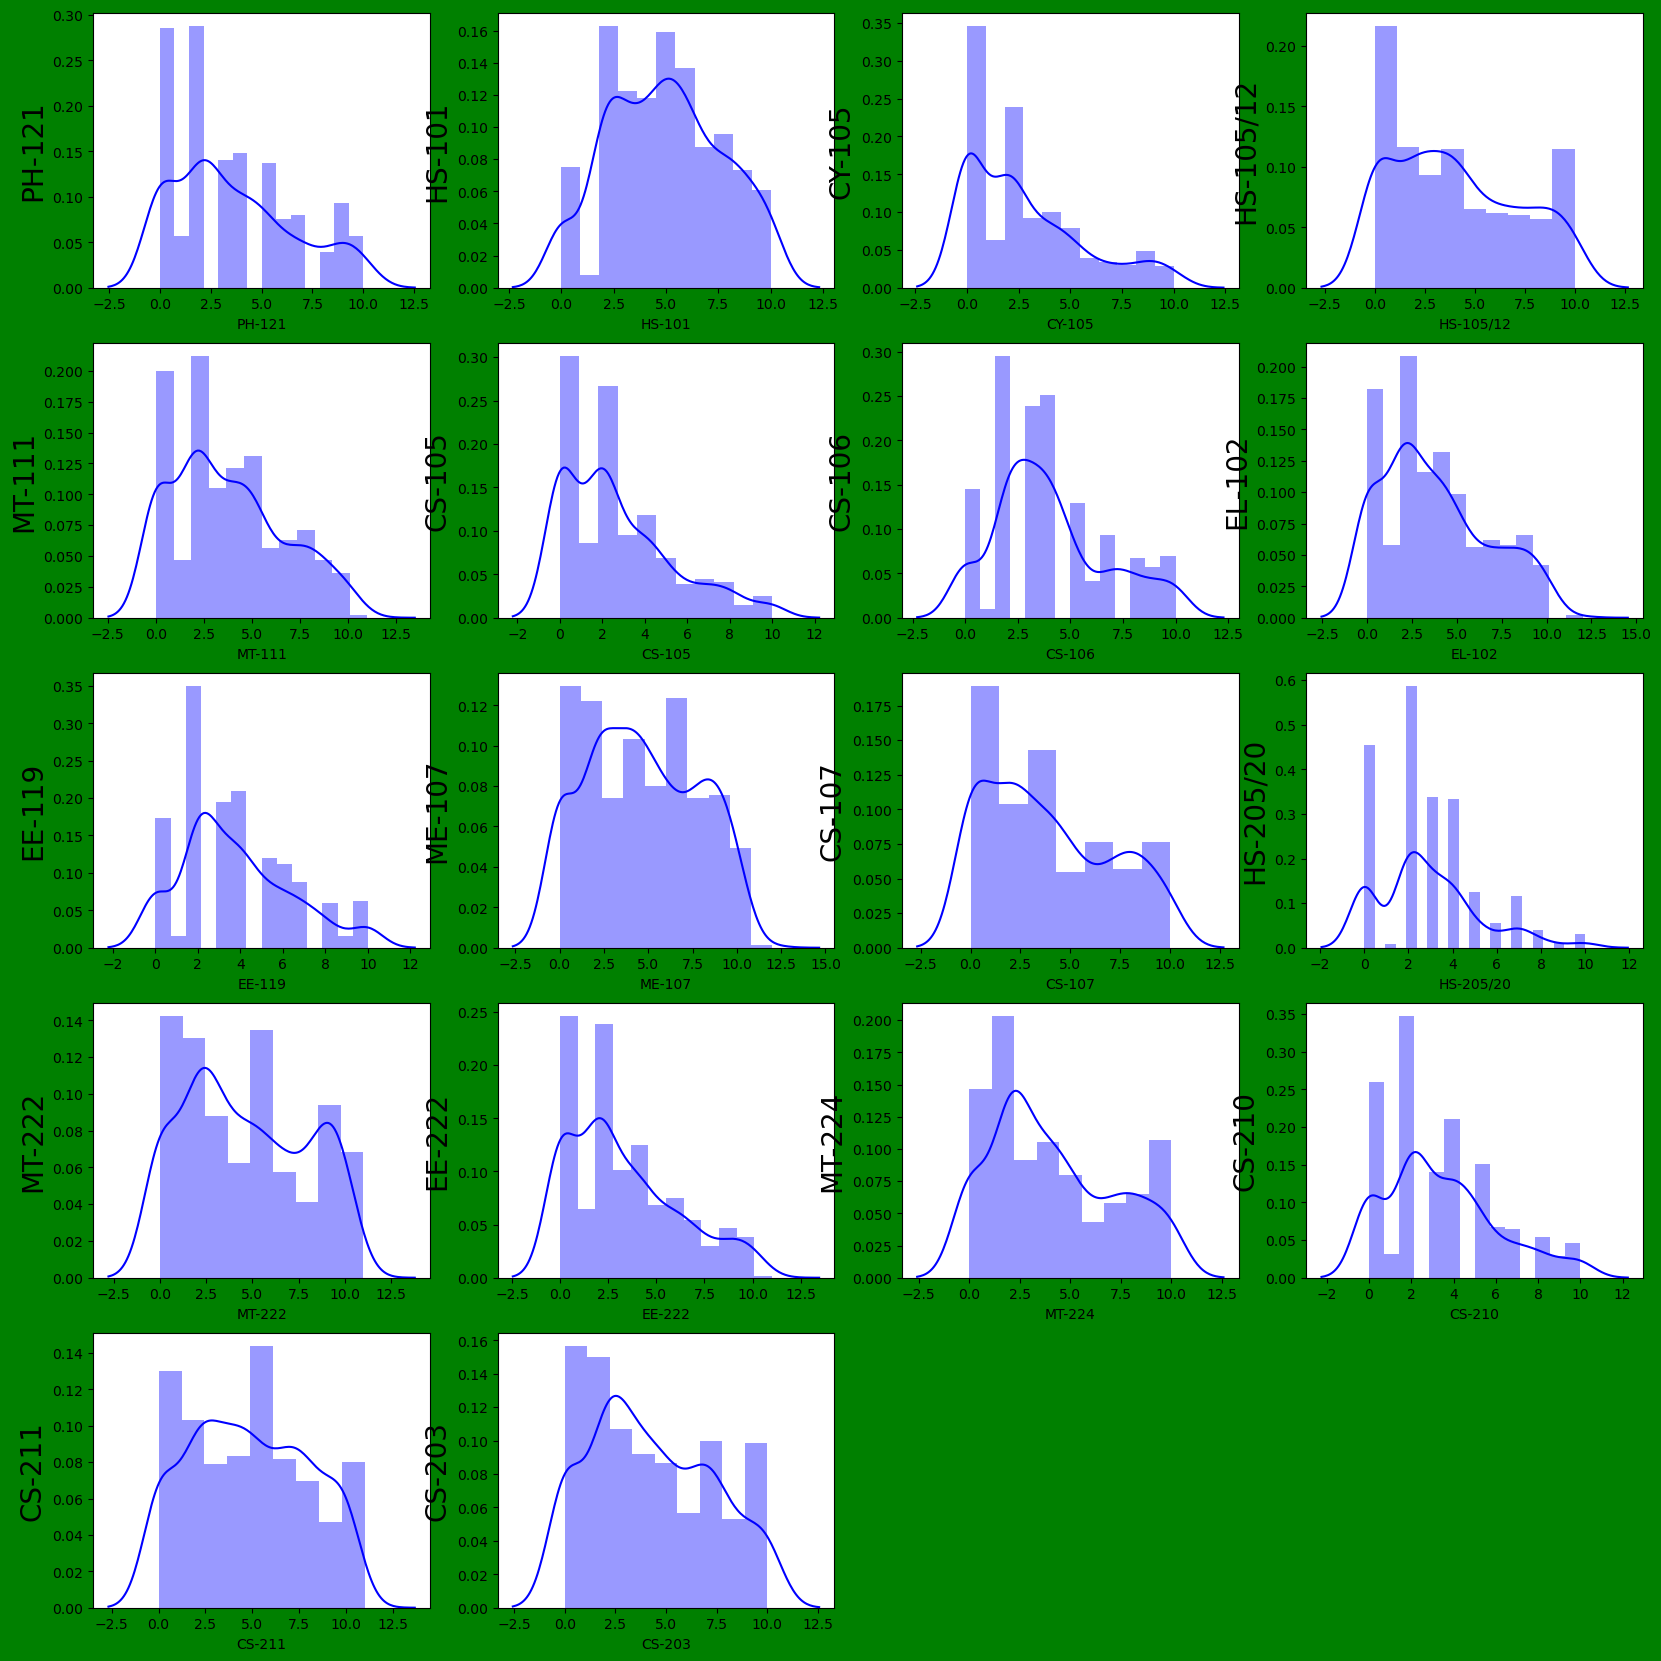

In [52]:
#checking distribution of data after removing skeweness
plt.figure(figsize=(20,25), facecolor='green')
plotnumber = 1

for column in df:
    if plotnumber<=18:     
        ax = plt.subplot(6,4,plotnumber)
        sns.distplot(df[column],color='b')
        plt.ylabel(column,fontsize=20)
    plotnumber+=1
plt.show()#there is not much difference from before

In [54]:
#checking correlation between  features and target
cor = df.corr()
cor

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
PH-121,1.000000,0.349464,0.528068,0.481932,0.431073,0.587163,0.279904,0.393218,0.580401,0.519364,...,0.038764,0.459304,0.352856,0.291585,0.241269,0.100119,0.490646,0.110260,0.339570,-0.634161
HS-101,0.349464,1.000000,0.310953,0.478545,0.416890,0.373196,0.325841,0.329853,0.305428,0.326936,...,0.226462,0.354046,0.251647,0.298101,0.138712,0.175892,0.299403,0.238125,0.231340,-0.515703
CY-105,0.528068,0.310953,1.000000,0.493364,0.522462,0.566109,0.365001,0.411126,0.479126,0.461730,...,0.305989,0.509562,0.526722,0.411669,0.154441,-0.006366,0.497947,0.169454,0.136046,-0.660512
HS-105/12,0.481932,0.478545,0.493364,1.000000,0.482151,0.466315,0.484398,0.334449,0.371944,0.289715,...,0.290731,0.493790,0.490877,0.448266,0.083840,0.112608,0.493040,0.240262,0.175997,-0.608535
MT-111,0.431073,0.416890,0.522462,0.482151,1.000000,0.358790,0.511237,0.527899,0.396185,0.451997,...,0.506691,0.559706,0.462581,0.541300,0.238037,0.206248,0.538880,0.452587,0.297658,-0.736437
CS-105,0.587163,0.373196,0.566109,0.466315,0.358790,1.000000,0.291774,0.318678,0.497810,0.430639,...,0.056469,0.382574,0.317509,0.241953,0.211194,0.076820,0.338956,0.040822,0.189271,-0.576115
CS-106,0.279904,0.325841,0.365001,0.484398,0.511237,0.291774,1.000000,0.327919,0.263936,0.286270,...,0.504831,0.431763,0.476703,0.439106,0.090165,0.097007,0.450246,0.349215,0.198596,-0.547210
EL-102,0.393218,0.329853,0.411126,0.334449,0.527899,0.318678,0.327919,1.000000,0.435935,0.444151,...,0.317481,0.464083,0.339729,0.379861,0.207452,0.232412,0.409173,0.402422,0.291244,-0.636553
EE-119,0.580401,0.305428,0.479126,0.371944,0.396185,0.497810,0.263936,0.435935,1.000000,0.553130,...,0.139594,0.437431,0.363727,0.348980,0.264471,0.146139,0.464414,0.226738,0.339097,-0.638624
ME-107,0.519364,0.326936,0.461730,0.289715,0.451997,0.430639,0.286270,0.444151,0.553130,1.000000,...,0.209988,0.463200,0.355330,0.343468,0.232108,0.114070,0.457171,0.230653,0.317436,-0.666520


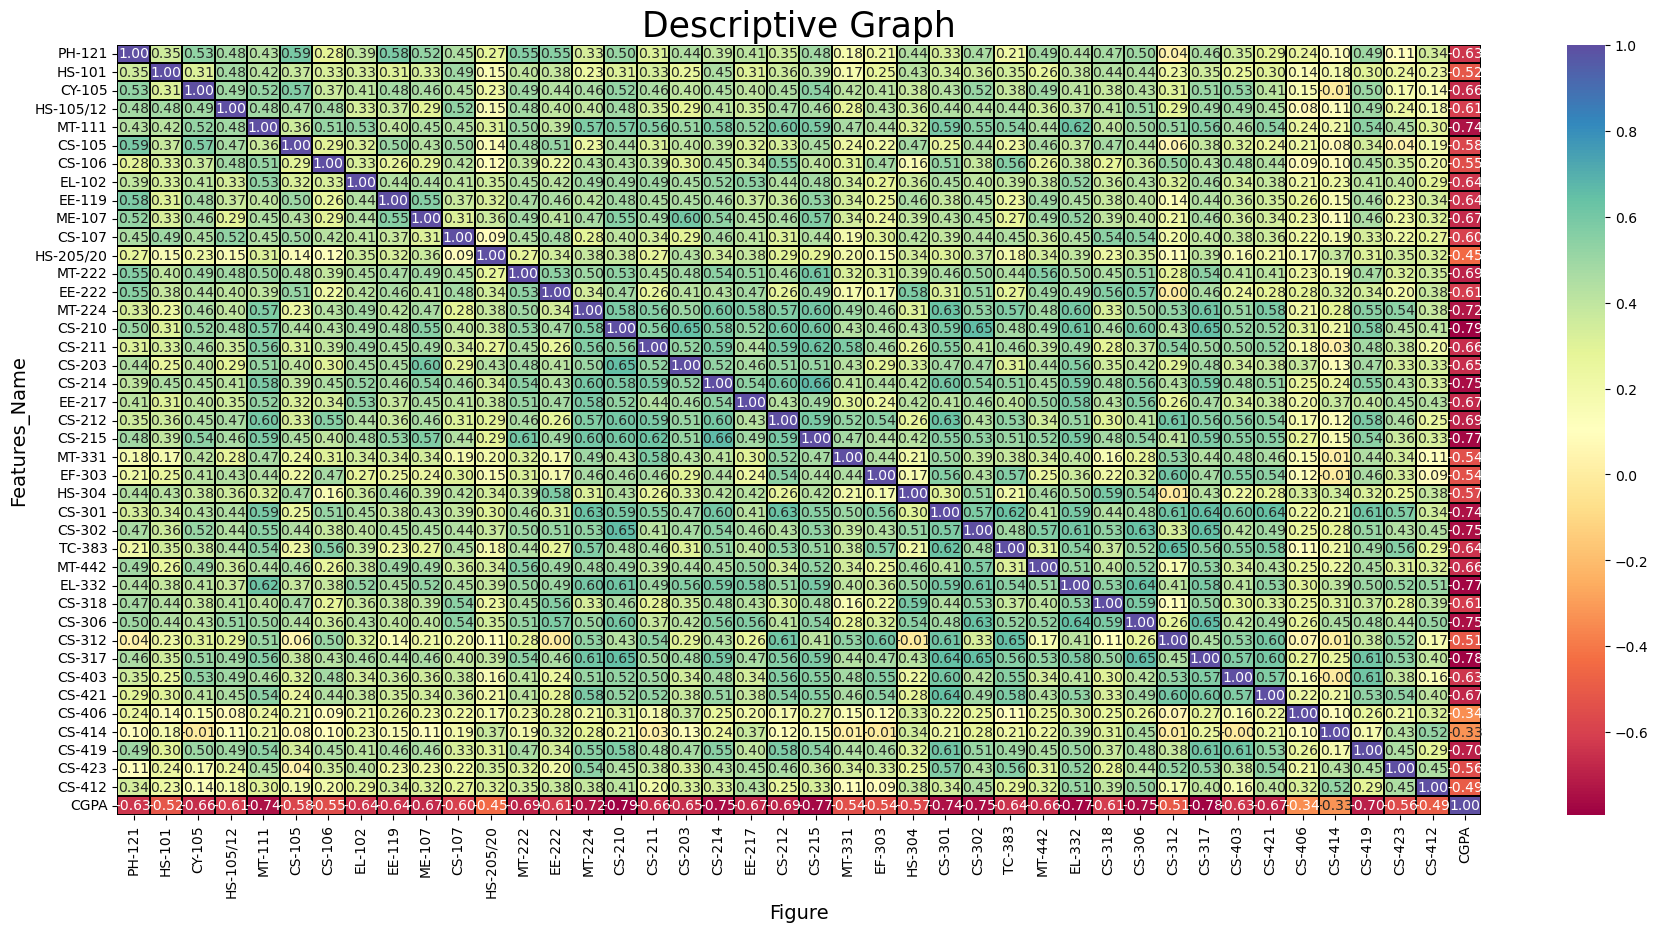

In [57]:
#Checking correlation using a graphic heatmap
plt.figure(figsize=(22,10))
sns.heatmap(df.corr(),annot=True,fmt='0.2f',linewidth=0.2,linecolor='black',cmap='Spectral')
plt.xlabel('Figure',fontsize=14)
plt.ylabel('Features_Name',fontsize=14)
plt.title('Descriptive Graph',fontsize=25)
plt.show()

<Axes: >

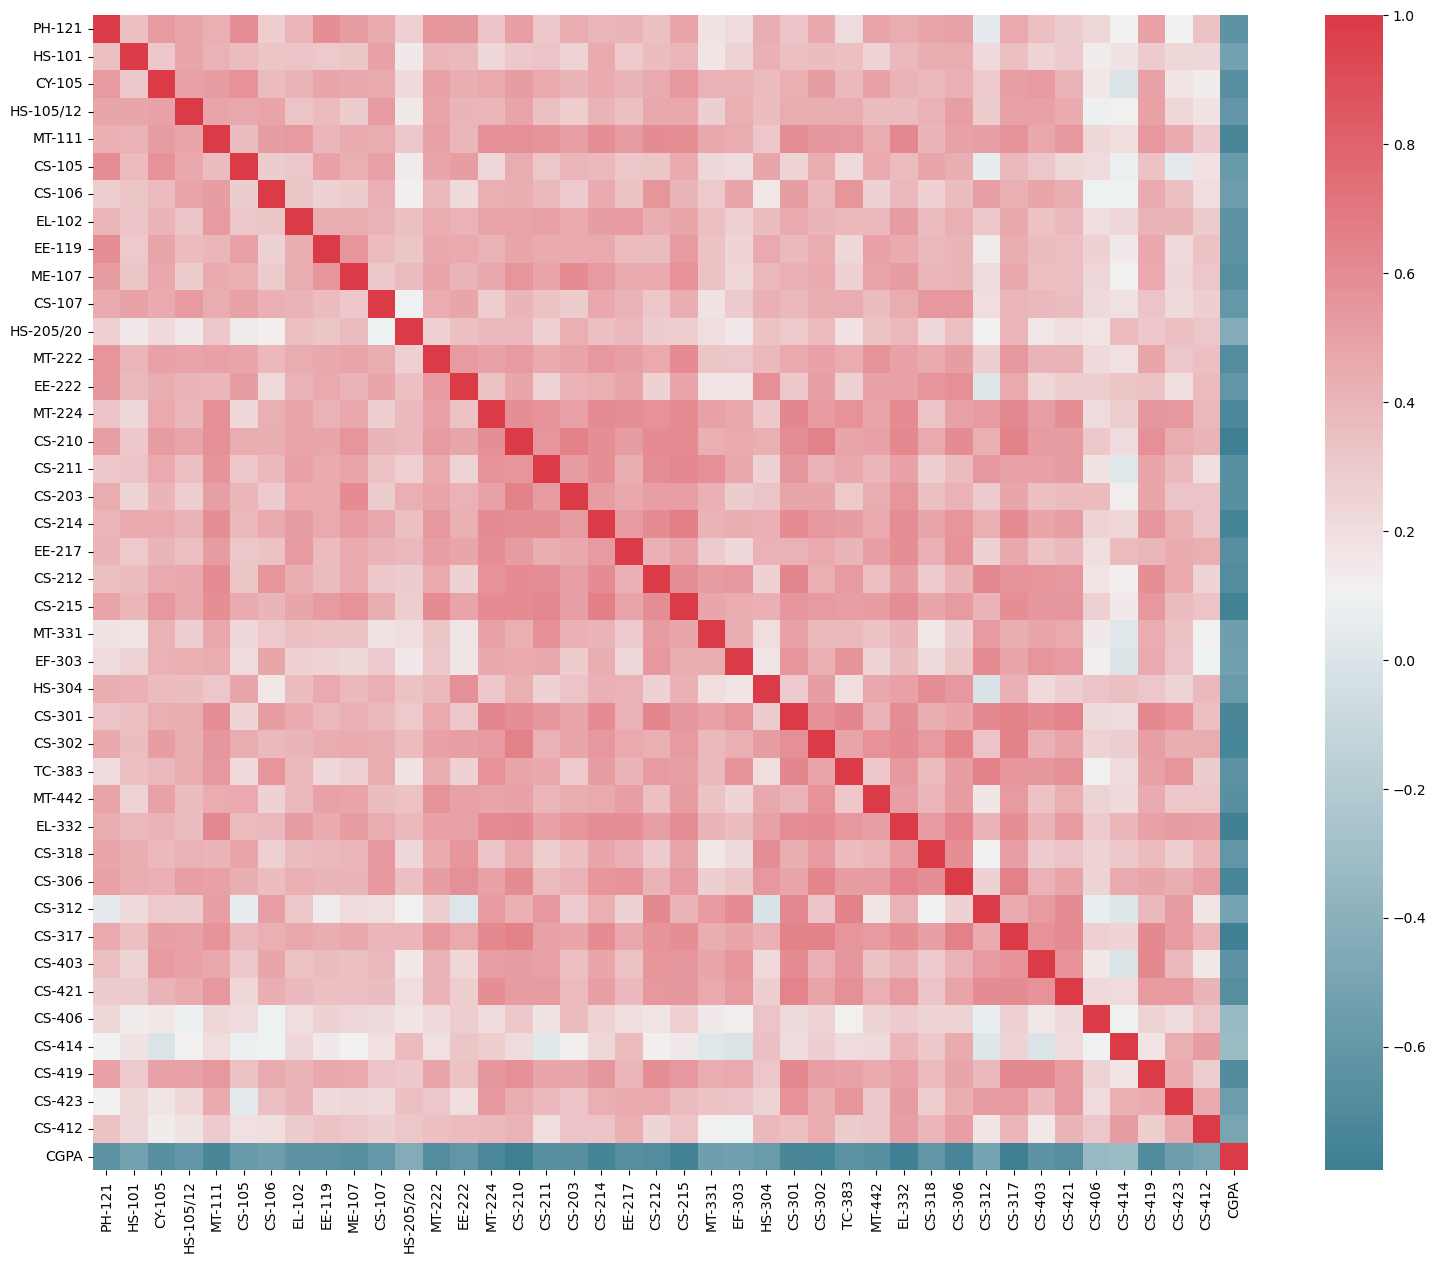

In [58]:
#Visualizing the correlation matrix byplotting heatmap.
f, ax = plt.subplots(figsize=(20, 15))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [ ]:
#features are both negatively and positively correlated as shown above which is a case of multicollinearity.Some are not correlated at all.
#the multicollinearity must be removed but before that we need to seperate featurs and labels

In [60]:
#Seperate the target and independent variables into x and y
x=df.drop("CGPA",axis=1)
y=df["CGPA"]
print("Feature Dimension=",x.shape)
print("Label Dimension=",y.shape)

Feature Dimension= (540, 41)
Label Dimension= (540,)


In [61]:
#Feature scaling and using standard scalarization to remove biasness
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,0.465432,1.859787,1.846904,0.611014,1.475224,2.811932,1.864221,1.418110,0.480240,1.082103,...,0.754011,1.211755,1.229287,1.526490,1.062747,0.302278,-1.034743,1.821538,-0.319352,-0.420472
1,-1.219108,1.492052,2.554230,1.571095,0.437507,1.271147,1.864221,-1.287824,2.412651,1.404941,...,1.851492,1.816512,1.600548,0.855232,1.446358,0.302278,1.382044,0.959461,0.779056,0.085218
2,-1.219108,-0.714360,-0.982396,0.290987,0.091601,-1.040030,0.367300,0.065143,-0.679207,-0.854921,...,-0.709298,-0.300139,-0.627019,-1.158541,0.295523,-2.390862,-1.034743,-1.626773,-0.685488,-1.431852
3,1.813064,0.756581,2.554230,1.571095,1.821130,-0.269637,2.238451,1.418110,2.026169,0.759266,...,1.485665,1.816512,0.486765,2.197747,1.062747,0.590910,0.415329,1.390499,1.145192,2.107978
4,-0.545292,-1.082095,-0.275071,-0.029039,-1.292022,-1.040030,-0.755391,0.065143,-1.452171,-0.854921,...,-0.709298,0.304619,-0.255758,0.183974,-0.088089,0.302278,-1.034743,-0.764695,-0.685488,-1.431852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,-0.545292,1.492052,-0.982396,0.611014,0.091601,0.500755,0.741530,-0.611341,0.480240,1.404941,...,1.485665,-0.300139,0.858026,0.183974,1.829970,0.651931,2.832116,-0.333656,0.779056,1.096598
536,-0.208384,-1.817565,-0.982396,-0.669093,-0.946117,-1.040030,-0.755391,-0.611341,-1.065689,-0.209246,...,0.022356,-0.602518,-0.998280,-1.158541,-2.006147,-2.390862,0.898687,0.097383,-0.319352,-1.431852
537,-0.882200,-1.817565,-0.982396,-1.309147,-1.292022,-1.040030,-1.503851,-0.611341,-1.452171,-1.500596,...,-0.709298,0.002240,-0.255758,-1.158541,-2.006147,0.302278,0.415329,-0.764695,0.779056,-0.420472
538,-0.208384,-1.817565,-0.275071,-0.029039,-1.292022,-1.040030,-1.503851,-1.287824,-1.452171,-0.532084,...,0.022356,-0.602518,-0.627019,-1.158541,-0.471700,-2.390862,1.865402,0.097383,-0.685488,-0.420472


In [62]:
#Checking Variance inflation factor in each scaled column that is x.shape[1](1/(1-R2))
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF values,Features
0,2.760434,PH-121
1,1.806796,HS-101
2,2.476021,CY-105
3,2.360009,HS-105/12
4,2.672987,MT-111
5,2.350132,CS-105
6,1.972670,CS-106
7,1.895355,EL-102
8,2.164003,EE-119
9,2.334771,ME-107


In [ ]:
#I will not drop any column because the  VIF values are nit so far apart.The data will be dealt with by regularisation methods like Lasso and Ridge Regression

In [63]:
#Modelling
#import the necessary libraries

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

In [64]:
#Creating train test split
#Finding the best random state

maxAccu = 0
maxRS = 0
for i in range (1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    LR=LinearRegression()
    LR.fit(x_train,y_train)
    pred=LR.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu,"at random_state",maxRS)

Maximum r2 score is  0.9869259297099773 at random_state 166


In [65]:
#Import Regression algorithms

from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor

In [66]:
#checking accuracy of Linear Regression

LR=LinearRegression()
LR.fit(x_train,y_train)
pred_LR=LR.predict(x_test)
pred_train=LR.predict(x_train)
print('R2_score:',r2_score(y_test,pred_LR))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:-',mean_absolute_error(y_test,pred_LR))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_LR))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_LR)))

R2_score: 0.9667841705046304
R2_score on training data: 96.64424784340616
Mean Absolute Error:- 0.0732589771081758
Mean Squared Error:- 0.010612362681971185
Root Mean Squared Error:- 0.10301632240558378


In [67]:
#checking accuracy of RandomForestRegressor

RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR=RFR.predict(x_test)
pred_train=RFR.predict(x_train)
print('R2_score:',r2_score(y_test,pred_RFR))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:-',mean_absolute_error(y_test,pred_RFR))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_RFR))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_RFR)))

R2_score: 0.9346108159289399
R2_score on training data: 98.7821024821401
Mean Absolute Error:- 0.10616777777777765
Mean Squared Error:- 0.020891657603703685
Root Mean Squared Error:- 0.14453946728732497


In [68]:
#checking accuracy of KNN Model

knn=KNN()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
pred_train=knn.predict(x_train)
print('R2_score:',r2_score(y_test,pred_knn))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:-',mean_absolute_error(y_test,pred_knn))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_knn))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_knn)))

R2_score: 0.9425430827996883
R2_score on training data: 96.00775878400292
Mean Absolute Error:- 0.09490123456790123
Mean Squared Error:- 0.01835732098765432
Root Mean Squared Error:- 0.13548919140527158


In [69]:
#checking accuracy of the Gradient Boosting Regressor

GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR=GBR.predict(x_test)
pred_train=GBR.predict(x_train)
print('R2_score:',r2_score(y_test,pred_GBR))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:-',mean_absolute_error(y_test,pred_GBR))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_GBR))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_GBR)))

R2_score: 0.955916466737409
R2_score on training data: 99.72156120716154
Mean Absolute Error:- 0.08643658234555726
Mean Squared Error:- 0.014084563004833982
Root Mean Squared Error:- 0.11867840159369346


In [70]:
#checking accuracy of the Lasso Regressor

lasso=Lasso()
lasso.fit(x_train,y_train)
pred_lasso=lasso.predict(x_test)
pred_train=lasso.predict(x_train)
print('R2_score:',r2_score(y_test,pred_lasso))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:-',mean_absolute_error(y_test,pred_lasso))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_lasso))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_lasso)))

R2_score: -4.437748233332428e-07
R2_score on training data: 0.0
Mean Absolute Error:- 0.4653920896204847
Mean Squared Error:- 0.3194972864654778
Root Mean Squared Error:- 0.5652409101130931


In [71]:
#checking accuracy of the Ridge Regressor

rd=Ridge()
rd.fit(x_train,y_train)
pred_rd=rd.predict(x_test)
pred_train=rd.predict(x_train)
print('R2_score:',r2_score(y_test,pred_rd))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:-',mean_absolute_error(y_test,pred_rd))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_rd))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_rd)))

R2_score: 0.9669585487752193
R2_score on training data: 96.64419510942362
Mean Absolute Error:- 0.07302344438536128
Mean Squared Error:- 0.010556649322423705
Root Mean Squared Error:- 0.1027455562174039


In [72]:
#checking accuracy of the Decision Tree Regressor

dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_dtr=dtr.predict(x_test)
pred_train=dtr.predict(x_train)
print('R2_score:',r2_score(y_test,pred_dtr))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:-',mean_absolute_error(y_test,pred_dtr))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_dtr))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_dtr)))

R2_score: 0.8219818708944631
R2_score on training data: 100.0
Mean Absolute Error:- 0.17655555555555555
Mean Squared Error:- 0.05687628395061729
Root Mean Squared Error:- 0.23848749223097065


In [73]:
#Cross validation Score
from sklearn.model_selection import cross_val_score

In [74]:
#Checking CV score for Linear Regressor
score=cross_val_score(LR,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is -",r2_score(y_test,pred_LR)-score.mean())

[0.89101544 0.98329046 0.96815104 0.97258336 0.96398237]
0.9558045333572576
Difference between R2 score and cross validation score is - 0.010979637147372823


In [75]:
#Checking CV score for Random Forest Regressor
score=cross_val_score(RFR,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is -",r2_score(y_test,pred_RFR)-score.mean())

[0.87885987 0.94549612 0.95092952 0.94348071 0.90644473]
0.9250421893780013
Difference between R2 score and cross validation score is - 0.009568626550938597


In [76]:
#Checking CV score for KNN model
score=cross_val_score(knn,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is -",r2_score(y_test,pred_knn)-score.mean())

[0.88208264 0.96121822 0.96108313 0.94108446 0.9096184 ]
0.9310173714296301
Difference between R2 score and cross validation score is - 0.0115257113700582


In [77]:
#Checking CV score for Gradient Boosting Regressor model
score=cross_val_score(GBR,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is -",r2_score(y_test,pred_GBR)-score.mean())

[0.86939768 0.97057294 0.96198425 0.95039242 0.9496969 ]
0.940408839786064
Difference between R2 score and cross validation score is - 0.015507626951345


In [78]:
#Checking CV score for Lasso Regressor model
score=cross_val_score(lasso,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is -",r2_score(y_test,pred_lasso)-score.mean())

[-0.02421798 -0.01992401 -0.00225556 -0.00457969 -0.10489343]
-0.031174135279965397
Difference between R2 score and cross validation score is - 0.031173691505142063


In [79]:
#Checking CV score for Ridge Regressor model
score=cross_val_score(rd,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is -",r2_score(y_test,pred_rd)-score.mean())

[0.89109278 0.9833659  0.96827455 0.97270531 0.96415963]
0.9559196324111804
Difference between R2 score and cross validation score is - 0.011038916364038864


In [80]:
#Checking CV score for Decision tree regressor model
score=cross_val_score(dtr,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is -",r2_score(y_test,pred_dtr)-score.mean())

[0.79099578 0.66463244 0.86087145 0.71535067 0.83718441]
0.7738069517815721
Difference between R2 score and cross validation score is - 0.04817491911289096


In [ ]:
#Model Selected is Random Forest Regressor with the least difference between r2 score and cross validation

In [89]:
#Hyper parameter tuning

from sklearn.model_selection import GridSearchCV
parameters={'n_estimators':[1,2],'criterion':['squared_error','absolute_error'],'max_depth':['None'],'random_state':[10,50,100],'bootstrap':['bool,True']}

GVC=GridSearchCV(RandomForestRegressor(),parameters,cv=5)
GVC.fit(x_train,y_train)

GVC.best_params_
{'n_estimators':100,'criterion':'squared_error','max_depth':'None','random_state':1000,'bootstrap':'True'}

Final_model=RandomForestRegressor(n_estimators=100,criterion,'squared_error',max_depth='None',random_state=1000,bootstrap='True')
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

SyntaxError: positional argument follows keyword argument (1500056601.py, line 12)